# Statistische Modelle in den Geowissenschaften

Zettel 4

Abgabe bis Mittwoch 24.05.2023 um 15:00Uhr im Whiteboard.

## Aufgabe 2: Random Forests (5 Punkte)

In dieser Übung werden wir einen RF aus aktuellen Berliner Wetterdaten erstellen. Lesen Sie dazu die Datenbeschreibung im Refubium:   https://refubium.fu-berlin.de/handle/fub188/38460

und laden die Datei 01_Tempelhof-1_2006_Daten.zip herunter: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_2006_Daten.zip?sequence=2&isAllowed=y

Zu diesem Datensatz gibt es nochmal eine gesonderte Beschreibung welche Sie sich gern ansehen können: https://refubium.fu-berlin.de/bitstream/handle/fub188/38460/01_Tempelhof-1_Beschreibung.pdf?sequence=3&isAllowed=y

Das Einlesen und Benennen der Daten geht recht einfach (die Variablennamen stehen in der gezipten .csv Datei). In R verwendet man hierfür am besten einen sogenannten Data-Frame. Die Funktion `read.table()` erzeugt diesen automatisch:

In [2]:
variables <- c("Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY",
"air_temperature"                            ,"air_temperature_guete",                # C
"relative_humidity"                          ,"relative_humidity_guete",              # %
"duration_of_sunshine"                       ,"duration_of_sunshine_guete",           # min                       
"air_pressure_at_station_level"              ,"air_pressure_at_station_level_guete",  # hPa              
"air_temperature2"                           ,"air_temperature2_guete",                   # C      
"height_of_precipitation"                    ,"height_of_precipitation_guete",            # mm       
"wind_speed_maximum"                         ,"wind_speed_maximum_guete",                 # m/s        
"soil_temperature"                           ,"soil_temperature_guete",                   # C        
"wind_speed_mean"                            ,"wind_speed_mean_guete",                    # m/s       
"global_solar_radiation"                     ,"global_solar_radiation_guete",             # W/m^2        
"air_temperature3"                           ,"air_temperature3_guete",                   # C        
"air_temperature4"                           ,"air_temperature4_guete",                   # C       
"wind_from_direction_at_wind_speed_maximum"  ,"wind_from_direction_at_wind_speed_maximum_guete",  # degree 
"wind_from_direction"                        ,"wind_from_direction_guete")                        # degree

data <- read.table(unzip("D:/Studium/Master.Meteorologie/stati/Ü/daten/01_Tempelhof-1_2006_Daten.zip","01_Tempelhof-1_2006_Daten.csv"),col.names=variables)


Benutzen sie z.B. die `str()` und die `dim()` Funktion um sich einen Überlick über die Daten zu verschaffen.
Sie werden sehen, das wir Variablen mit Integer, Real und Character Inhalten haben. Die Character Variablen betreffen allerdings nur die "_guete" Variablen welche kaum Informationen enthalten. Wir entfernen sie im Weiteren:

In [7]:
dim(data)

[1] 525600     36

In [8]:
str(data)

'data.frame':	525600 obs. of  36 variables:
 $ Jahr                                           : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ Monat                                          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Tag                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Stunde                                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Minute                                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ WDay                                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WoY                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DoY                                            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ air_temperature                                : num  2.3 2.4 2.3 2.4 2.4 2.4 2.4 2.4 2.4 2.5 ...
 $ air_temperature_guete                          : Factor w/ 3 levels "g","k","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ relative_humidity                              : num  99 99 99 99 

In [3]:
 data2use <- data[c("Jahr","Monat","Tag","Stunde","Minute","WDay","WoY","DoY","air_temperature",
                    "relative_humidity","duration_of_sunshine","air_pressure_at_station_level",
                    "height_of_precipitation","wind_speed_maximum" ,"soil_temperature" ,"wind_speed_mean" ,
                    "global_solar_radiation", "wind_from_direction_at_wind_speed_maximum","wind_from_direction")]

Wir erzeugen nun aus `data2use` einen RF wie in der Vorlesung gezeigt. Verwenden also die Funktion `randomForest()` aus dem `randomForest` package. Zielgröße ist in diesem Fall `soil_temperature`. Diese soll aus allen anderen Variablen in `data` bestimmt werden. 


In [4]:
library(randomForest)
model <- randomForest(
   formula = soil_temperature ~ ., data=data2use, na.action="na.omit" , sampsize=20000, mtry=3, ntree=150)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


### A) (1 Punkt)

Wenden sie die `plot()` und die `varImpPlot()` Funktion auf den erzeugeten RF an. Diskutieren sie die Ergebnisse kurz in jeweils 1-2 Sätzen.



### B) (2 Punkte)

Durch `model$mse` erhält man Zugriff auf die geplottete Fehlerkurve. Plotten sie diese für verschiedene RFs welche mit `mtry`= 1 bis 10 traineiert wurden. `mtry` ist ein Metaparameter des Entscheidungsbaumgenerierung. Lesen Sie sich die Beschreibung zu `mtry` in der die R-Hilfe `?randomForest` durch. Plotten sie die verschiedenen Kurven idealerweise in einem Plot. Diskutieren sie das Ergebnis. (HINWEIS: In diesem Teil kann es gut sein, dass die Ausführung des Codes eine Weile dauert)

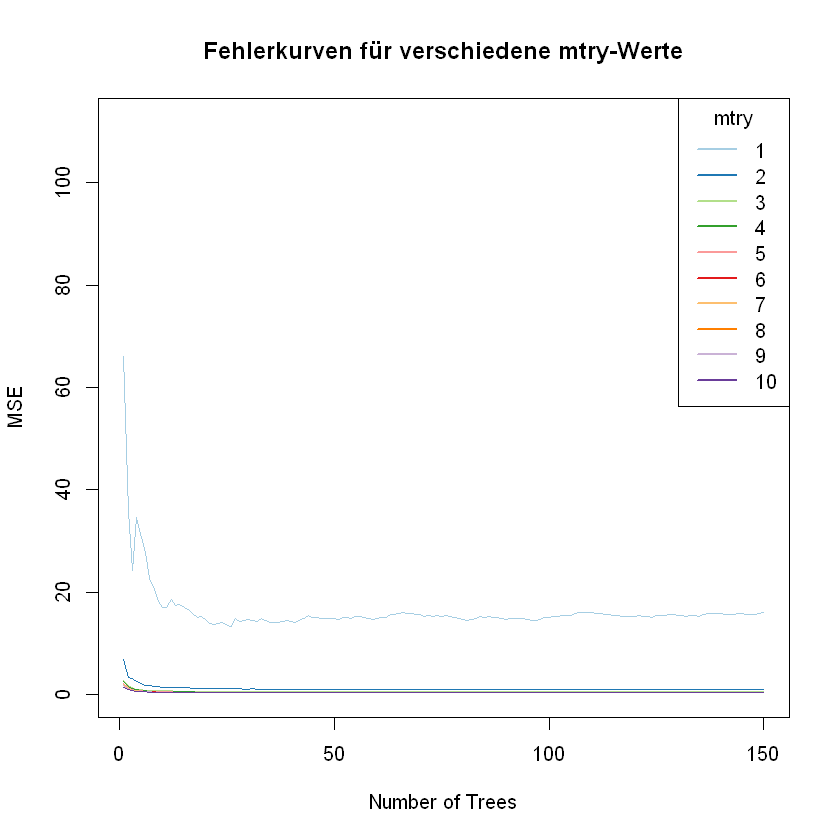

In [8]:
library(RColorBrewer)
col_palette <- brewer.pal(10, "Paired")
mtry_list <- 1:10

# Erstellen des leeren Plots
plot(1, type = "n", xlim = c(1, 150), ylim = c(0, max(model$mse)),
     xlab = "Number of Trees", ylab = "MSE", main = "Fehlerkurven für verschiedene mtry-Werte")

# Iteration über mtry-Werte
for (m in mtry_list) {
  model_iter <- randomForest(formula = soil_temperature ~ ., 
                             data = data2use, na.action = "na.omit", 
                             sampsize = 20000, mtry = m, ntree = 150)
  lines(model_iter$mse, type = "l", col = col_palette[m])
}

# Legende hinzufügen
legend("topright", legend = mtry_list, col = col_palette, lty = 1, lwd = 2,
       title = "mtry")

Für die Fehlerkurve 


 Eine steil abfallende Fehlerkurve kann darauf hinweisen, dass das Modell bei höheren mtry-Werten deutlich an Leistung gewinnt. Dies deutet auf eine höhere Modellkomplexität hin, da mehr Variablen für die Entscheidungsfindung verwendet werden. Wenn die Fehlerkurve für verschiedene mtry-Werte relativ flach ist und keine deutlichen Spitzen oder Täler aufweist, deutet dies auf eine gewisse Stabilität des Modells hin. Es bedeutet, dass die Leistung des Modells nicht stark von der Wahl des mtry-Werts abhängt. In unserem Fall, ist es so dass die Fehlerkurve zunächst sehr stark fällt und so mit aussagt, dass bei höheren mtry-Werten deutlich an Leistung gewinnt, aber ab 4 mtry die Fehlerkurve sehr flach ist und keine deutlichen Spitzen oder Täler aufweist und somit eine gewisse Stabilität hindeutet.